In [1]:
import numpy as np
import h5py 
import sys
sys.path.append("../src")
from L_layer_model_03.L_layer_model import *

In [2]:
with h5py.File("../EIDSeg_Dataset/cache/eidseg_64x64_binary_any.h5", "r") as f:
    X_train_org = f["X_train"][:]
    Y_train_org = f["Y_train"][:]
    X_test_org  = f["X_test"][:]
    Y_test_org  = f["Y_test"][:]

m_train = X_train_org.shape[0]
m_test = X_test_org.shape[0]
num_px =X_train_org.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train_org.shape))
print ("train_set_y shape: " + str(Y_train_org.shape))
print ("test_set_x shape: " + str(X_test_org.shape))
print ("test_set_y shape: " + str(Y_test_org.shape))

Number of training examples: m_train = 2612
Number of testing examples: m_test = 327
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (2612, 64, 64, 3)
train_set_y shape: (1, 2612)
test_set_x shape: (327, 64, 64, 3)
test_set_y shape: (1, 327)


In [3]:
with h5py.File("../EIDSeg_Dataset/cache//eidseg_64x64_binary_any_flat.h5", "r") as f:
    train_x = f["train_x"][:]   # (12288, m)
    train_y = f["train_y"][:]   # (1, m)
    test_x  = f["test_x"][:]    # (12288, m)
    test_y  = f["test_y"][:]    # (1, m)

print ("train_set_x flatten shape: " + str(train_x.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x flatten shape: " + str(test_x.shape))
print ("test_set_y shape: " + str(test_y.shape))

train_set_x flatten shape: (12288, 2612)
train_set_y shape: (1, 2612)
test_set_x flatten shape: (12288, 327)
test_set_y shape: (1, 327)


## L-layer Neural Network


In [4]:

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, X_test=None, Y_test=None):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    # np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.

    parameters = initialize_parameters_deep(layers_dims)
        
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
                
        # Compute cost.
        cost = compute_cost(AL,Y)
            
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.

        parameters = update_parameters(parameters, grads, learning_rate)
                        
        # Print the cost every 100 iterations and for the last iteration
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
    if X_test is not None and Y_test is not None:
        train_pred = predict(train_x,parameters)
        test_pred = predict(test_x, parameters)
        train_acc = accuracy(train_pred, train_y)
        test_acc = accuracy(test_pred, test_y)
        print(f"Final train accuracy: {train_acc:.2f}%")
        print(f"Final test accuracy:  {test_acc:.2f}%")

    
    return parameters, costs

In [5]:
layers_dims = [12288, 64, 16, 5, 1] 

X_gc = train_x[:, :5]
Y_gc = train_y[:, :5]

parameters = initialize_parameters_deep(layers_dims)
AL, caches = L_model_forward(X_gc, parameters)
grads = L_model_backward(AL, Y_gc, caches)

difference = gradient_check_L_layer(
    parameters,
    grads,
    X_gc,
    Y_gc,
    layers_dims
)


❌ Backprop error detected! difference = 2.7552063513895956e-07


In [6]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.008,num_iterations = 3500, print_cost = True, X_test=test_x, Y_test=Y_test_org)

Cost after iteration 0: 0.6931471600413884
Cost after iteration 100: 0.6648274867427709
Cost after iteration 200: 0.6458086211867267
Cost after iteration 300: 0.6329726837990823
Cost after iteration 400: 0.6242553982405361
Cost after iteration 500: 0.6182964561254158
Cost after iteration 600: 0.6141974312336479
Cost after iteration 700: 0.6113615196202804
Cost after iteration 800: 0.609389369026848
Cost after iteration 900: 0.6080116774723673
Cost after iteration 1000: 0.6070454671490193
Cost after iteration 1100: 0.6063655359070916
Cost after iteration 1200: 0.6058856659739862
Cost after iteration 1300: 0.6055461466238469
Cost after iteration 1400: 0.6053054171438258
Cost after iteration 1500: 0.6051344231201712
Cost after iteration 1600: 0.6050127759429925
Cost after iteration 1700: 0.6049261212460458
Cost after iteration 1800: 0.6048643245300402
Cost after iteration 1900: 0.6048202133312576
Cost after iteration 2000: 0.6047887010123194
Cost after iteration 2100: 0.604766173823127
Co

=== Model Evaluation Report ===


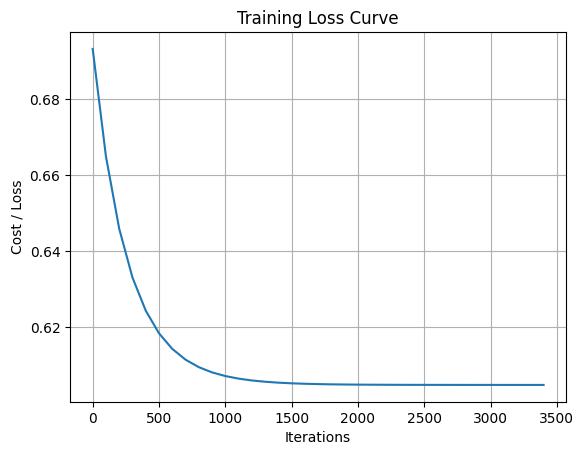

In [7]:
from eval_utils import *
from visualization import *

print_report(parameters)
plot_costs(costs)

# Let's try with Learning decays

In [9]:
def lr_schedule(i):
    if i < 500:
        return 0.008
    elif i < 1000:
        return 0.001
    elif i < 1500:
        return 0.0001
    elif i < 2000:
        return 0.00001
    else:
        return 0.01


In [10]:

def L_layer_model_with_leaning_decay(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, X_test=None, Y_test=None):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    # np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.

    parameters = initialize_parameters_deep(layers_dims)
        
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        ##update learnign rate digital
        learning_rate = lr_schedule(i)
        
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
                
        # Compute cost.
        cost = compute_cost(AL,Y)
            
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.

        parameters = update_parameters(parameters, grads, learning_rate)
                        
        # Print the cost every 100 iterations and for the last iteration
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
    if X_test is not None and Y_test is not None:
        train_pred = predict(train_x,parameters)
        test_pred = predict(test_x, parameters)
        train_acc = accuracy(train_pred, train_y)
        test_acc = accuracy(test_pred, test_y)
        print(f"Final train accuracy: {train_acc:.2f}%")
        print(f"Final test accuracy:  {test_acc:.2f}%")

    
    return parameters, costs

In [12]:
layers_dims = [12288, 64, 16, 5, 1] 

parameters, costs = L_layer_model_with_leaning_decay(train_x, train_y, layers_dims, learning_rate = 0.008,num_iterations = 2500, print_cost = True, X_test=test_x, Y_test=Y_test_org)

Cost after iteration 0: 0.6931471834716803
Cost after iteration 100: 0.6648294508999499
Cost after iteration 200: 0.6458112866975745
Cost after iteration 300: 0.6329755064293097
Cost after iteration 400: 0.6242581021842402
Cost after iteration 500: 0.6182989086093864
Cost after iteration 600: 0.6176998812748977
Cost after iteration 700: 0.6171281293175821
Cost after iteration 800: 0.6165823603470201
Cost after iteration 900: 0.6160613459823396
Cost after iteration 1000: 0.6155639185430148
Cost after iteration 1100: 0.6155154348907925
Cost after iteration 1200: 0.6154671748350815
Cost after iteration 1300: 0.6154191373023122
Cost after iteration 1400: 0.6153713212242906
Cost after iteration 1500: 0.6153237255382102
Cost after iteration 1600: 0.6153189780997269
Cost after iteration 1700: 0.6153142328534817
Cost after iteration 1800: 0.6153094897984188
Cost after iteration 1900: 0.6153047489334887
Cost after iteration 2000: 0.6153000102576373
Cost after iteration 2100: 0.6114976063060573


=== Model Evaluation Report ===


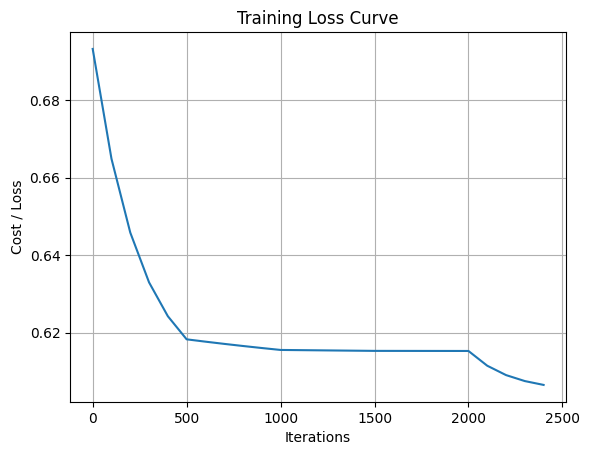

In [13]:
from eval_utils import *
from visualization import *

print_report(parameters)
plot_costs(costs)

# **It didn't do much so i think the problem is with the depth of the NN is not enough to recognize damaged buildings**